# R Plots

In [1]:
library('magrittr') 
library('ggmap')
library('ggplot2')
library('usmap')

Warning message:
“package ‘ggmap’ was built under R version 3.6.3”Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.

Attaching package: ‘ggmap’

The following object is masked from ‘package:magrittr’:

    inset



In [2]:
costco <- read.csv('costcos-geocoded.csv')
ppg <- read.csv('ppg2008.csv')
costco_sum <- costco %>% 
  dplyr::mutate(state = State) %>% 
  dplyr::group_by(state) %>%
  dplyr::summarise(store_count = dplyr::n())

## R- Heat Map

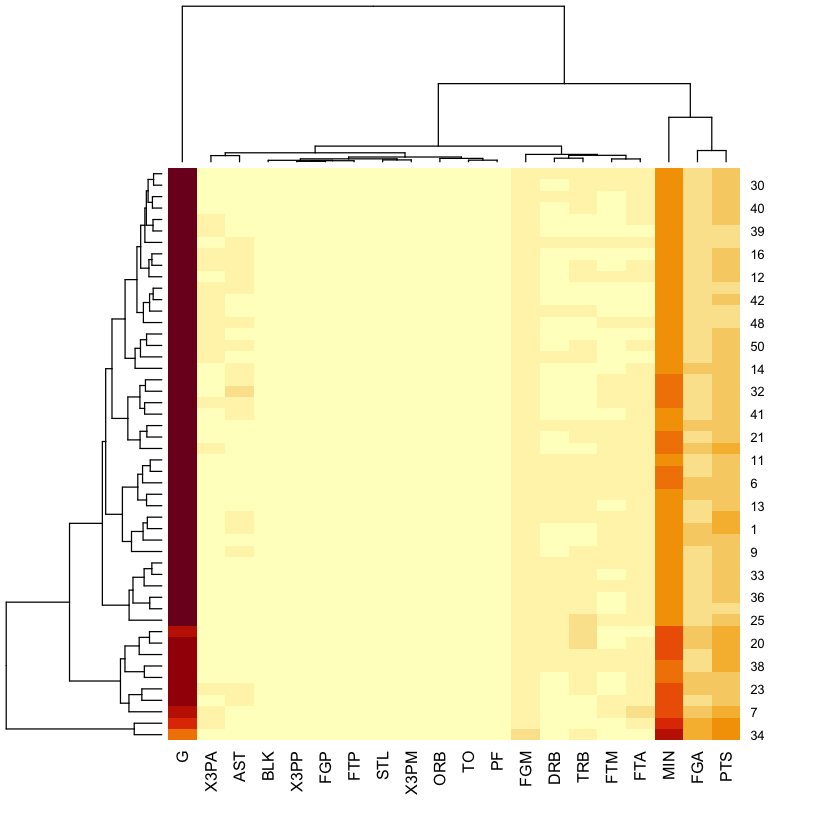

In [3]:
# options(repr.plot.width = 10, repr.plot.height = 7)
heatmap(as.matrix(ppg[,2:ncol(ppg)]))

## R - Spatial Chart

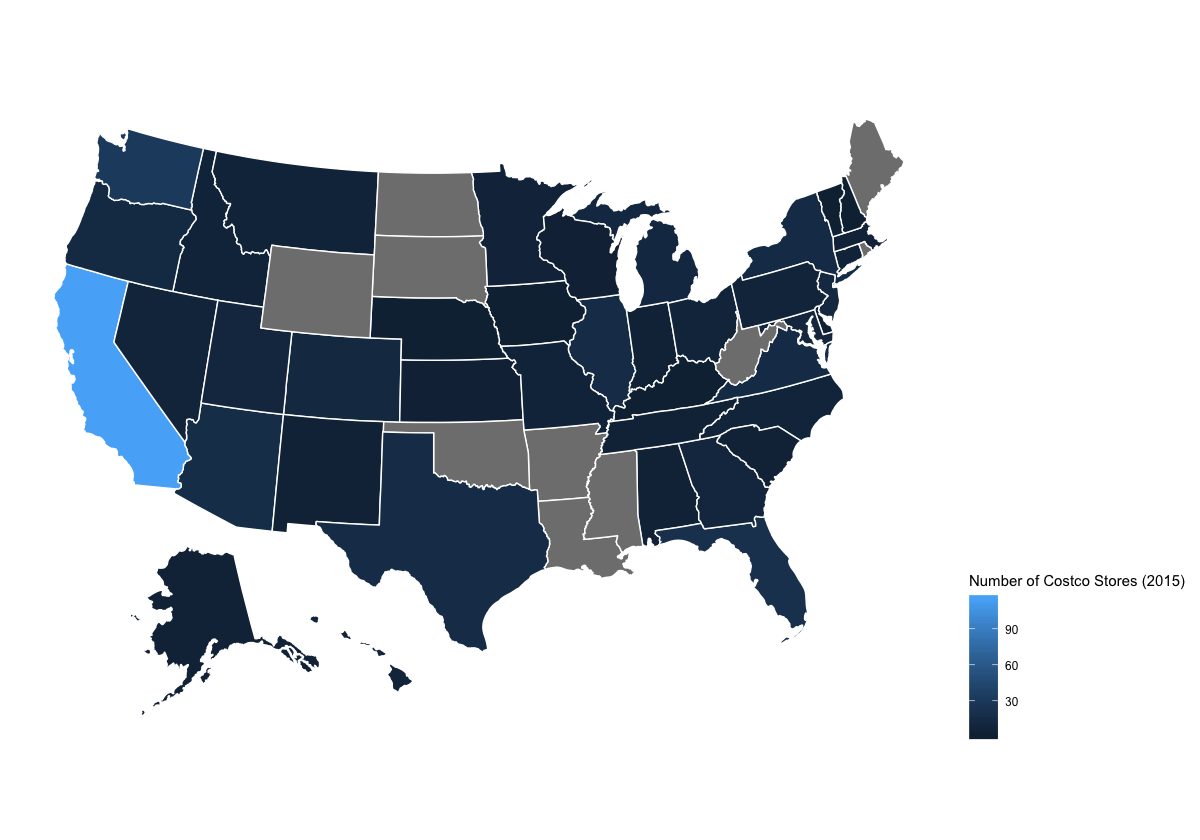

In [4]:
options(repr.plot.width = 10, repr.plot.height = 7)

plot_usmap(data = costco_sum, values = "store_count", lines = "white") + 
  scale_fill_continuous(name = "Number of Costco Stores (2015)", label = scales::comma) + 
  theme(legend.position = "right")

## R - Contour plot

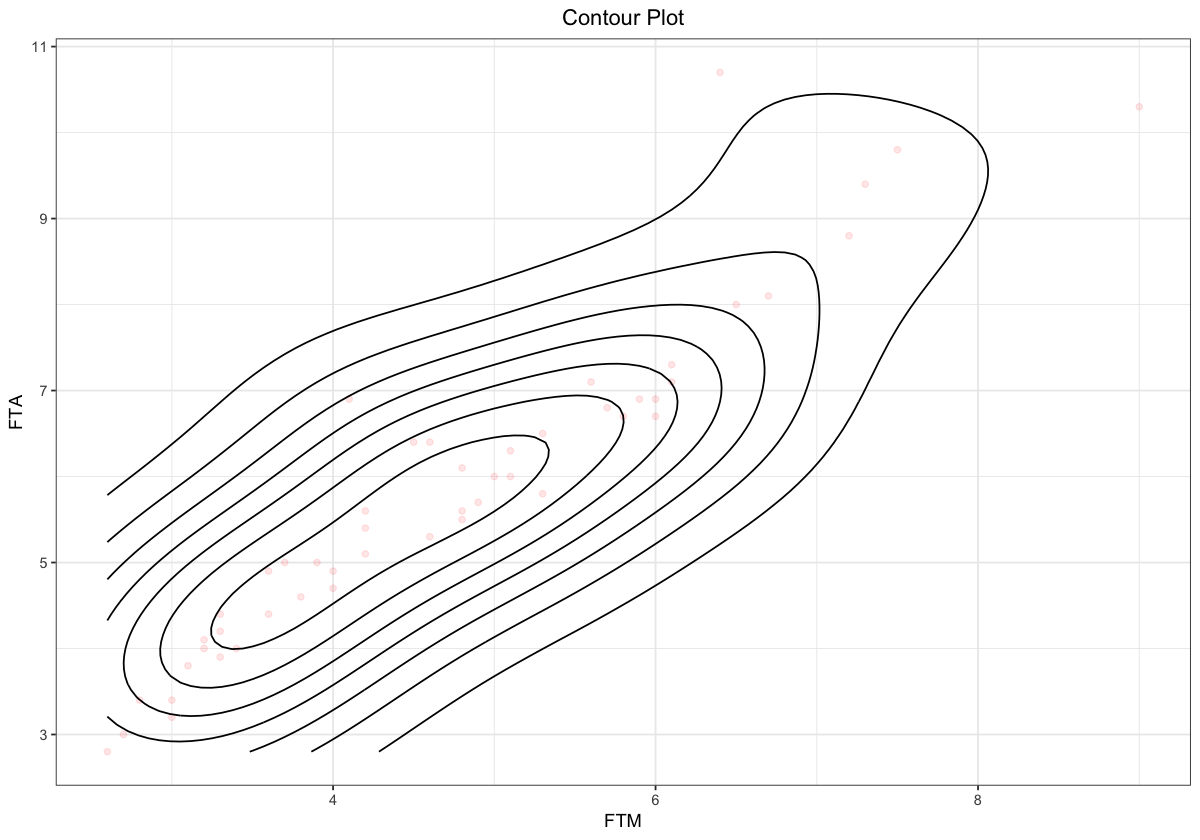

In [5]:
options(repr.plot.width = 10, repr.plot.height = 7)
ggplot(ppg, aes(x=FTM, y=FTA))+
  theme_bw()+
  geom_point(alpha=0.1, col='red')+
  geom_density2d(color='black')+
  ggtitle('Contour Plot')+
  theme(plot.title = element_text(hjust = 0.5))+
  labs(x='FTM', y='FTA')